## Importando bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import missingno


# Criando dataframe com a base de dados exportada

In [ ]:
df = pd.read_csv('pns2019.csv')

### Imprimeindo as primeiras linhas da dataframe:

In [ ]:
df.head(10)

### Verificando a quantidade de linhas:

In [ ]:
rows = df.shape[0]
rows

## Verificando quantas instâncias temos para cada varíável de tipo de entrevista (Domicilio Fechado, Recusa, Domicílio vago etc ).


In [ ]:
df['V0015'].value_counts()

## Filtrando apenas os registros em que as entrevistas foram realizadas

In [8]:
df = df.query('V0015 == 1')
df['V0015'].value_counts()


V0015
1    279382
Name: count, dtype: int64

## Selecionando variáveis relavantes que relacionam trabalho e saúde

In [9]:
colunas_a_manter = [
    # Estado da federação
    "V0001",
    
    # Características Gerais dos Moradores:
    "C006", "C008", "C009",
    
    # Plano de saúde
    "I00102",

    # Cuidados com a saúde
    "J01101", "J012", "J01301", "J037", "J038",
    
    # Sobre trabalho
    "E019", "E017", "E01401",
    
    # Trabalho noturno
    "M005010", "M00601",

    # Exposição a fatores de risco
    "M011011", "M011021", "M011031", "M011041", "M011051", "M011061", "M011071",

    # Percepção da saúde
    "N001", "N00101", "N016", "N017",
    
    #Diagnótico de doenças:
    "Q00201", "Q03001", "Q060","Q06306", "Q068", "Q074",
    "Q079", "Q084", "Q088", "Q092", "Q09202", "Q11006", "Q11604","Q120", "Q124", "Q132",

    # Rendimento domiciliar, excluindo o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico
    "VDF002"
    
]

In [10]:
df = df[colunas_a_manter]
df.head(20)

,V0001,C006,C008,C009,I00102,J01101,J012,J01301,J037,J038,...,Q084,Q088,Q092,Q09202,Q11006,Q11604,Q120,Q124,Q132,VDF002
0,11,2.0,55.0,1.0,2.0,1.0,2.0,1.0,2.0,NaN,...,1.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2098.0
1,11,1.0,69.0,4.0,2.0,1.0,2.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
2,11,1.0,31.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
3,11,1.0,9.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
4,11,2.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
5,11,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
6,11,2.0,33.0,1.0,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
7,11,1.0,17.0,1.0,2.0,2.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
8,11,2.0,15.0,4.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
9,11,2.0,19.0,4.0,2.0,1.0,1.0,1.0,2.0,NaN,...,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1000.0


### Renomeando códigos

In [11]:
colunas_e_nomes = {
    # Estado da federação
    "V0001": "uf",

    # Características Gerais dos Moradores:
    "C006": "sexo",
    "C008": "idade",
    "C009": "raca_cor",

    # Plano de saúde
    "I00102": "tem_plano_saude",

    # Cuidados com a saúde
    "J01101": "ultima_consulta_medica",
    "J012": "consultas_medicas_12m",
    "J01301": "ultima_consulta_dentista",
    "J037": "internacao_24h_12m",
    "J038": "num_internacoes",

    # Sobre trabalho
    "E019": "horas_trabalho_outros",  # Horas trabalhadas em outros trabalhos
    "E017": "horas_trabalho_principal",  # Horas trabalhadas no trabalho principal
    "E01401": "posicao_ocupacao",  # Posição na ocupação (empregado, conta própria, etc.)

    # Trabalho noturno
    "M005010": "trabalha_a_noite", # Se trabalha à noite,
    "M00601": "frequencia_trabalho_noturno",

   # Exposição a fatores de risco
    "M011011": "exposicao_substancias_quimicas",
    "M011021": "exposicao_ruido",
    "M011031": "exposicao_sol",
    "M011041": "exposicao_material_radioativo",
    "M011051": "exposicao_residuos_urbanos",
    "M011061": "exposicao_material_biologico",
    "M011071": "exposicao_poeira_mineral",


    # Percepção da saúde
    "N001": "estado_saude_geral", #Como avalia a saúde em geral
    "N00101": "estado_saude_bem_estar", #Considerando o bem estar físico e mental
    "N016": "sentiu_deprimido",  # Se sentiu deprimido/sem perspectiva (nas últimas 2 semanas)
    "N017": "sentiu_fracasso",  # Se sentiu mal consigo mesmo/fracasso (nas últimas 2 semanas)

    # Diagnóstico de doenças:
    "Q00201": "diagnostico_hipertensao",
    "Q03001": "diagnostico_diabetes",
    "Q060": "diagnostico_colesterol_alto",
    "Q06306": "diagnostico_doenca_coracao",
    "Q068": "diagnostico_avc",
    "Q074": "diagnostico_asma",
    "Q079": "diagnostico_artrite_reumatismo",
    "Q084": "diagnostico_problema_coluna",
    "Q088": "diagnostico_dort_ler",
    "Q092": "diagnostico_depressao",
    "Q09202": "medicamento_depressao",  # Usou medicamento para depressão
    "Q11006": "diagnostico_outra_doenca_mental",
    "Q11604": "diagnostico_doenca_pulmonar",
    "Q120": "diagnostico_cancer",
    "Q124": "diagnostico_insuficiencia_renal",
    "Q132": "medicamento_dormir", #Se usou medicamento para dormir

      # Rendimento domiciliar, excluindo o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico
    "VDF002": "rendimento_domiciliar"

}

colunas_a_manter = list(colunas_e_nomes.values())

## Imprimindo as 25 primeiras linhas do dataset para verificar as alterações

In [12]:
df.columns = colunas_a_manter
df.head(25)

,uf,sexo,idade,raca_cor,tem_plano_saude,ultima_consulta_medica,consultas_medicas_12m,ultima_consulta_dentista,internacao_24h_12m,num_internacoes,...,diagnostico_problema_coluna,diagnostico_dort_ler,diagnostico_depressao,medicamento_depressao,diagnostico_outra_doenca_mental,diagnostico_doenca_pulmonar,diagnostico_cancer,diagnostico_insuficiencia_renal,medicamento_dormir,rendimento_domiciliar
0,11,2.0,55.0,1.0,2.0,1.0,2.0,1.0,2.0,NaN,...,1.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2098.0
1,11,1.0,69.0,4.0,2.0,1.0,2.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
2,11,1.0,31.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
3,11,1.0,9.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
4,11,2.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
5,11,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2098.0
6,11,2.0,33.0,1.0,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
7,11,1.0,17.0,1.0,2.0,2.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
8,11,2.0,15.0,4.0,2.0,1.0,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
9,11,2.0,19.0,4.0,2.0,1.0,1.0,1.0,2.0,NaN,...,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1000.0


### Verificando a proporção de valores nulos para cada variável

In [13]:
# Percentual de dados nulos por coluna

percentual_valores_nulos = ((df.isnull().sum()/rows)*100).round(2)
percentual_valores_nulos

uf                                  0.00
sexo                                0.00
idade                               0.00
raca_cor                            0.00
tem_plano_saude                     0.00
ultima_consulta_medica              0.00
consultas_medicas_12m              24.85
ultima_consulta_dentista            0.00
internacao_24h_12m                  0.00
num_internacoes                    89.20
horas_trabalho_outros              93.42
horas_trabalho_principal           52.76
posicao_ocupacao                   52.76
trabalha_a_noite                   77.13
frequencia_trabalho_noturno        92.85
exposicao_substancias_quimicas     77.13
exposicao_ruido                    77.13
exposicao_sol                      77.13
exposicao_material_radioativo      77.13
exposicao_residuos_urbanos         77.13
exposicao_material_biologico       77.13
exposicao_poeira_mineral           77.13
estado_saude_geral                 64.19
estado_saude_bem_estar             64.19
sentiu_deprimido

## Em muitas colunas temos valores nulos.

#### De acordo com a análise do dataset, esses valores nulos são para perguntas da entrevista que não foram respondidas.
#### Possíveis motivos: Dada a condição/características do entrevistado, certas perguntas sisplesmente não eram aplicáveis, ou o mesmo decidia não responder a pergunta.

## Vamos visualizar esses valores nulos graficamente:

<Axes: >

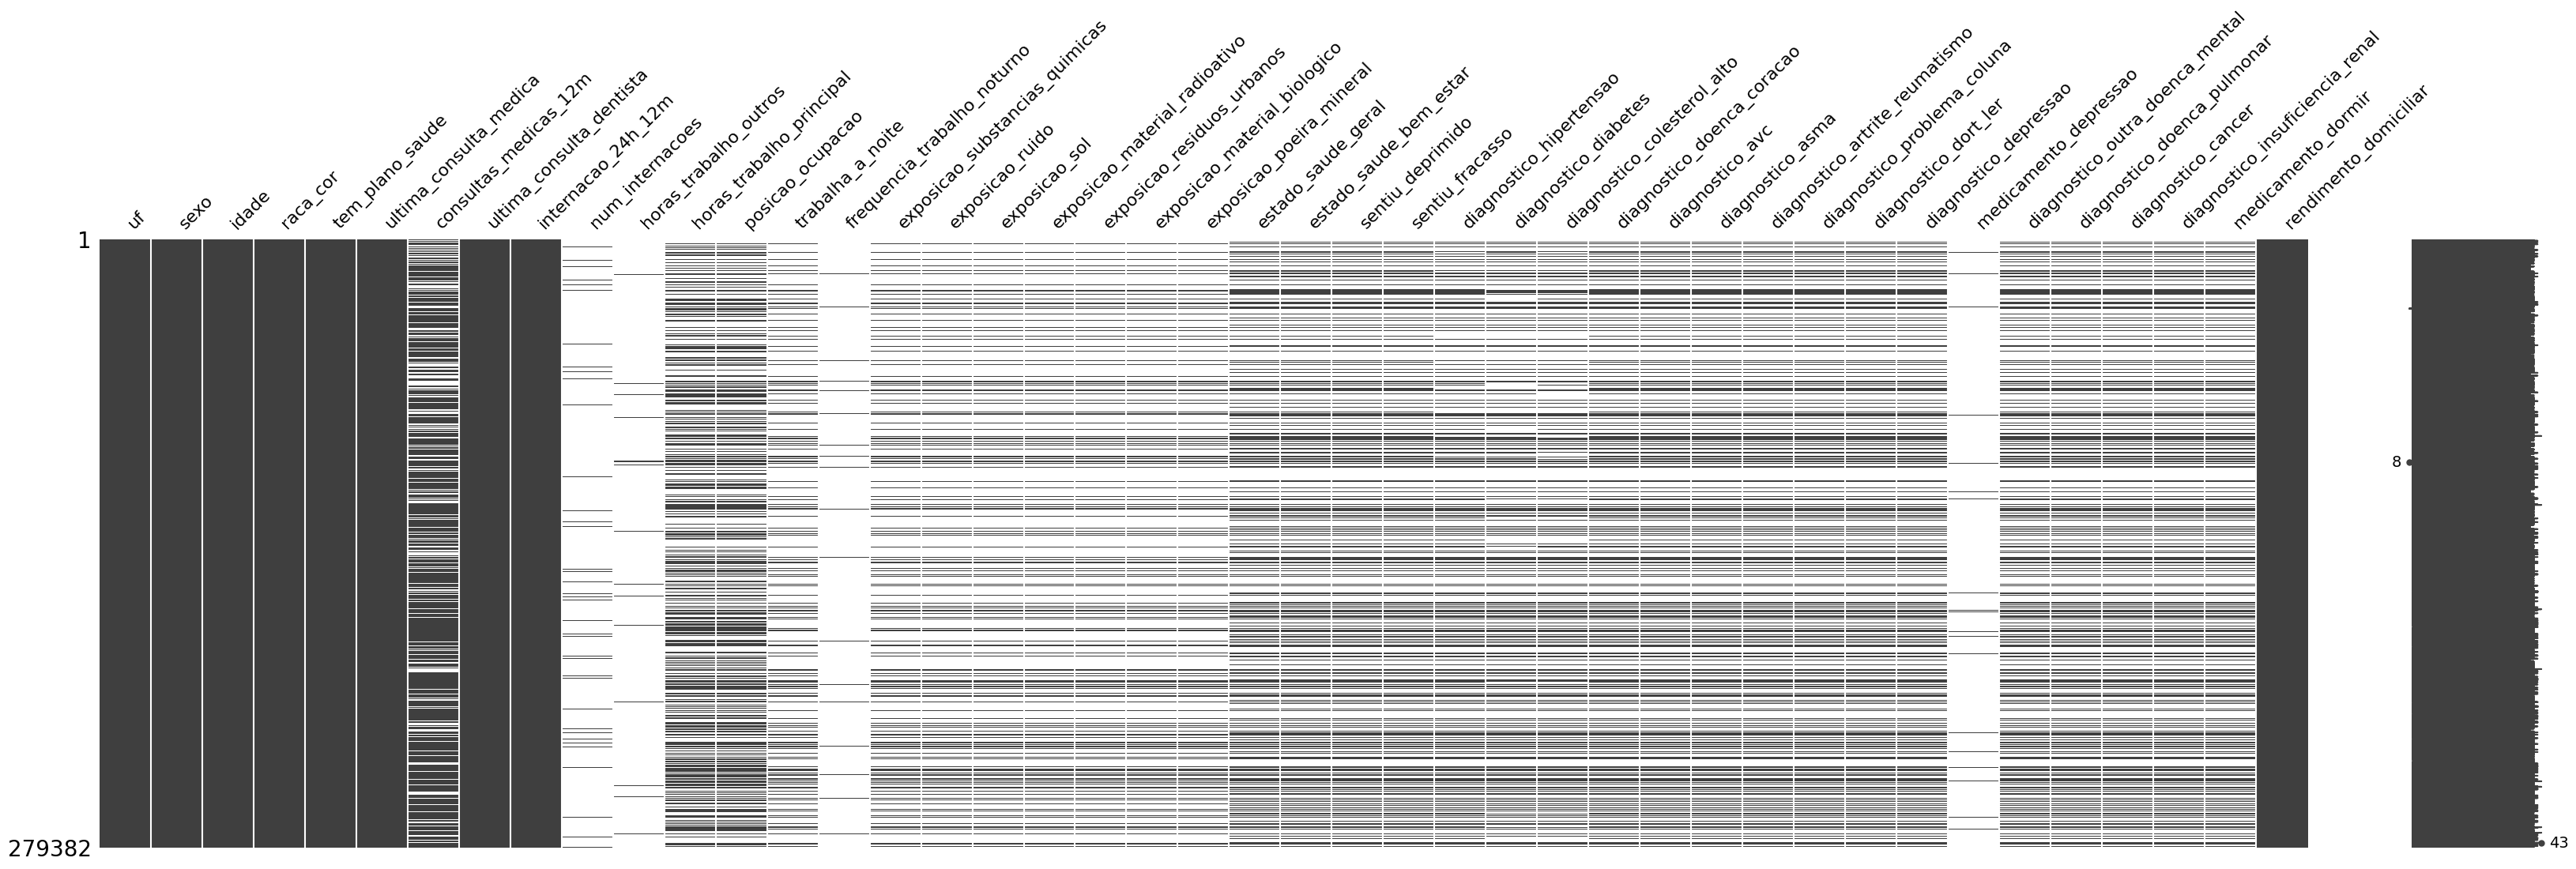

In [14]:
missingno.matrix(df, figsize = (40, 10))


## Agora, vamos substituir os valores nulos por 0 (Zero), que vai futuramente irá representar "Não respondido"

In [15]:
df = df.fillna(0).astype({col: 'int64' for col in df.select_dtypes('float64').columns})

In [16]:
df.head()

,uf,sexo,idade,raca_cor,tem_plano_saude,ultima_consulta_medica,consultas_medicas_12m,ultima_consulta_dentista,internacao_24h_12m,num_internacoes,...,diagnostico_problema_coluna,diagnostico_dort_ler,diagnostico_depressao,medicamento_depressao,diagnostico_outra_doenca_mental,diagnostico_doenca_pulmonar,diagnostico_cancer,diagnostico_insuficiencia_renal,medicamento_dormir,rendimento_domiciliar
0,11,2,55,1,2,1,2,1,2,0,...,1,2,1,3,2,2,2,2,2,2098
1,11,1,69,4,2,1,2,4,2,0,...,0,0,0,0,0,0,0,0,0,2098
2,11,1,31,2,2,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,2098
3,11,1,9,2,2,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,2098
4,11,2,6,4,2,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,2098


## Agora, nenhuma coluna possui valores nulos:

In [17]:
# Percentual de dados nulos por coluna

percentual_valores_nulos = ((df.isnull().sum()/rows)*100).round(2)
percentual_valores_nulos

uf                                 0.0
sexo                               0.0
idade                              0.0
raca_cor                           0.0
tem_plano_saude                    0.0
ultima_consulta_medica             0.0
consultas_medicas_12m              0.0
ultima_consulta_dentista           0.0
internacao_24h_12m                 0.0
num_internacoes                    0.0
horas_trabalho_outros              0.0
horas_trabalho_principal           0.0
posicao_ocupacao                   0.0
trabalha_a_noite                   0.0
frequencia_trabalho_noturno        0.0
exposicao_substancias_quimicas     0.0
exposicao_ruido                    0.0
exposicao_sol                      0.0
exposicao_material_radioativo      0.0
exposicao_residuos_urbanos         0.0
exposicao_material_biologico       0.0
exposicao_poeira_mineral           0.0
estado_saude_geral                 0.0
estado_saude_bem_estar             0.0
sentiu_deprimido                   0.0
sentiu_fracasso          

<Axes: >

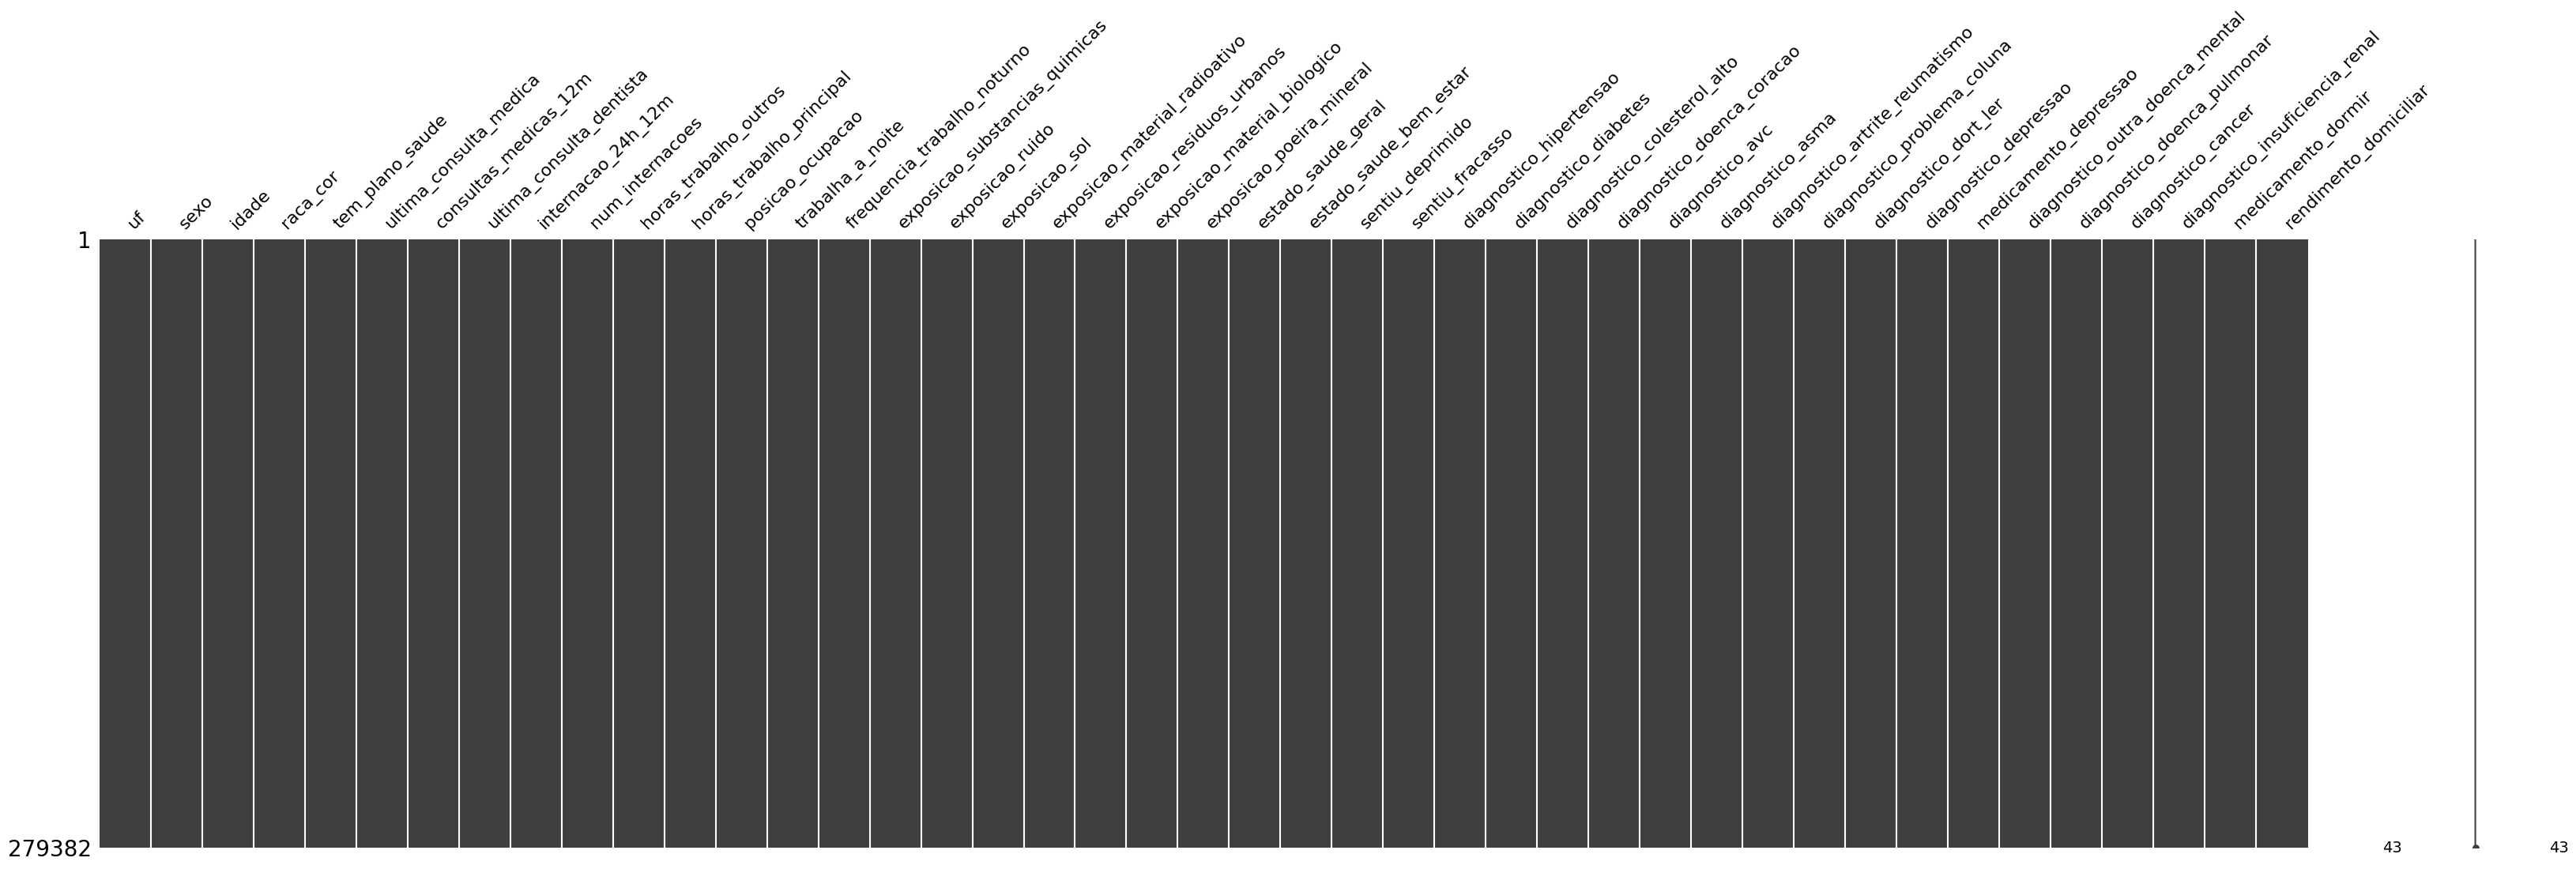

In [18]:
missingno.matrix(df, figsize = (40, 10))

## Buscando visualizar quantos homens e mulheres possuem plano de saúde. 
#### Dos aproximadamente 134 mil homens do dataset, aprox. 26 mil possuem plano.
#### Das aproximadamente 145 mil mulheres do dataset, aprox. 32 mil possuem plano.

In [19]:
df.groupby("sexo")["tem_plano_saude"].value_counts()

sexo  tem_plano_saude
1     2                  107728
      1                   26714
2     2                  113057
      1                   31883
Name: count, dtype: int64

### Substituindo valores de algumas colunas

In [20]:
df["sexo"] = df["sexo"].map({1: "Homem", 2: "Mulher"})
df["raca_cor"] = df["raca_cor"].map({1: "Branca", 2: "Preta", 3: "Amarela", 4: "Parda", 5:"Indígena", 0: "Não Respondido"})
df["tem_plano_saude"] = df["tem_plano_saude"].map({1: "Sim", 2: "Não", 0: "Não respondido"})
df["estado_saude_geral"] = df["estado_saude_geral"].map({1:	"Muito bom", 2:	"Bom", 3: "Regular", 4:	"Ruim", 5: "Muito ruim", 0: "Não respondido"})


In [21]:
df.head()


,uf,sexo,idade,raca_cor,tem_plano_saude,ultima_consulta_medica,consultas_medicas_12m,ultima_consulta_dentista,internacao_24h_12m,num_internacoes,...,diagnostico_problema_coluna,diagnostico_dort_ler,diagnostico_depressao,medicamento_depressao,diagnostico_outra_doenca_mental,diagnostico_doenca_pulmonar,diagnostico_cancer,diagnostico_insuficiencia_renal,medicamento_dormir,rendimento_domiciliar
0,11,Mulher,55,Branca,Não,1,2,1,2,0,...,1,2,1,3,2,2,2,2,2,2098
1,11,Homem,69,Parda,Não,1,2,4,2,0,...,0,0,0,0,0,0,0,0,0,2098
2,11,Homem,31,Preta,Não,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,2098
3,11,Homem,9,Preta,Não,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,2098
4,11,Mulher,6,Parda,Não,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,2098


### Criando dicionário para mapeamento do código de cada Estado e criando uma função para realizar a substituição dos valores:

In [ ]:
# Dicionário mapeando os códigos UF para os nomes dos estados.
#  PRECISA SER EXATAMENTE IGUAL AO DA IMAGEM/DADOS
uf_mapping = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

# Função para substituir os códigos pelos nomes dos estados
def replace_uf_code(df, column_name='uf'):
    """
    Substitui os códigos da UF pelos nomes dos estados em um DataFrame.

    Args:
        df (pd.DataFrame): O DataFrame onde a substituição será feita.
        column_name (str, optional): O nome da coluna que contém os códigos UF.
            Defaults to 'uf'.

    Returns:
        pd.DataFrame: O DataFrame com os códigos substituídos.  Retorna
        o DataFrame original se a coluna não existir, ou se ocorrer algum
        erro durante a substituição.

    """
    if column_name not in df.columns:
        print(f"Aviso: Coluna '{column_name}' não encontrada no DataFrame.")
        return df  # Retorna o DataFrame original sem modificações

    try:
        # Garante que os códigos UF sejam do tipo inteiro
        df[column_name] = df[column_name].astype(int)

        # Usa o método .map() para fazer a substituição
        df[column_name] = df[column_name].map(uf_mapping)

        # Trata possíveis NaNs após o mapeamento (se algum código não tiver correspondência)
        # Mantem o valor original (código numérico) caso nao encontre correspondência
        # df[column_name] = df[column_name].fillna(df[column_name])



    except (ValueError, TypeError) as e:
        print(f"Erro ao converter/substituir valores na coluna '{column_name}': {e}")
        return df  # Retorna o df original em caso de erro.

    return df

# Aplica a função para substituir os códigos UF
df = replace_uf_code(df, "uf")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
rows = df.shape[0]

## Criando nova variável que calcula o total de horas trabalhadas.

In [22]:
df['total_horas_trabalho'] = df['horas_trabalho_principal'] + df['horas_trabalho_outros']

df.head()

,uf,sexo,idade,raca_cor,tem_plano_saude,ultima_consulta_medica,consultas_medicas_12m,ultima_consulta_dentista,internacao_24h_12m,num_internacoes,...,diagnostico_dort_ler,diagnostico_depressao,medicamento_depressao,diagnostico_outra_doenca_mental,diagnostico_doenca_pulmonar,diagnostico_cancer,diagnostico_insuficiencia_renal,medicamento_dormir,rendimento_domiciliar,total_horas_trabalho
0,11,Mulher,55,Branca,Não,1,2,1,2,0,...,2,1,3,2,2,2,2,2,2098,40
1,11,Homem,69,Parda,Não,1,2,4,2,0,...,0,0,0,0,0,0,0,0,2098,0
2,11,Homem,31,Preta,Não,1,1,2,2,0,...,0,0,0,0,0,0,0,0,2098,36
3,11,Homem,9,Preta,Não,1,1,1,2,0,...,0,0,0,0,0,0,0,0,2098,0
4,11,Mulher,6,Parda,Não,1,1,1,2,0,...,0,0,0,0,0,0,0,0,2098,0


## Finalmente, convertando o dataframe em CSV para importação no PowerBI, onde será feito as demais transformações

In [ ]:
df.to_csv("PNS_trabalhoXSaude.csv", index=False, encoding="utf-8")


In [ ]:
df["sexo"].value_counts()

In [ ]:
df.groupby("uf")["diagnostico_diabetes"].value_counts()


In [ ]:
filtered_df = df[(df['idade'] > 20)]
filtered_df["sentiu_deprimido"].value_counts()

In [ ]:
df.describe()